# Import all the necessary library

In [ ]:
import tensorflow as tf
from keras.models import load_model
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



# Data Augmentation

In [ ]:
IMAGE_SIZE = [229, 229]      # (229,229) is the expected input size for InceptionV3

train_path = 'Dataset/train'
valid_path = 'Dataset/test'

In [ ]:
train_datagen= ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 644 images belonging to 2 classes.


# Instantiate InceptionV3 and Build the custom Model (Transfer Learning)

In [ ]:
Inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in Inception.layers:
    layer.trainable = False

In [ ]:
model = Sequential()

model.add(Inception)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

# Compile & Train the Model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
results = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
94/94 [==============================] - 1375s 15s/step - loss: 1.6521 - accuracy: 0.8320 - val_loss: 0.5187 - val_accuracy: 0.8742
Epoch 2/20
94/94 [==============================] - 52s 557ms/step - loss: 0.5897 - accuracy: 0.8863 - val_loss: 0.2442 - val_accuracy: 0.9286
Epoch 3/20
94/94 [==============================] - 52s 556ms/step - loss: 0.2812 - accuracy: 0.9023 - val_loss: 0.3246 - val_accuracy: 0.8882
Epoch 4/20
94/94 [==============================] - 52s 553ms/step - loss: 0.2241 - accuracy: 0.9187 - val_loss: 0.2023 - val_accuracy: 0.9441
Epoch 5/20
94/94 [==============================] - 52s 554ms/step - loss: 0.2067 - accuracy: 0.9250 - val_loss: 0.1744 - val_accuracy: 0.9239
Epoch 6/20
94/94 [==============================] - 52s 554ms/step - loss: 0.2178 - accuracy: 0.9147 - val_loss: 0.2213 - val_accuracy: 0.9317
Epoch 7/20
94/94 [==============================] - 52s 553ms/step

# Evaluating Model Performance

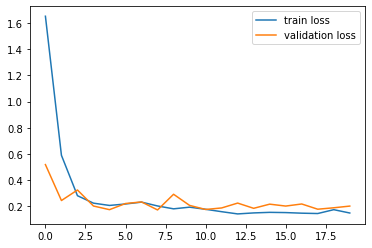

In [ ]:
# loss
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

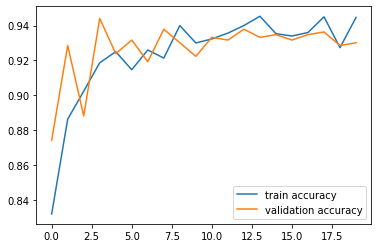

In [ ]:
# accuracies
plt.plot(results.history['accuracy'], label='train accuracy')
plt.plot(results.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
test_set.class_indices

{'hotdog': 0, 'nothotdog': 1}

# Saving and Loading the Model

In [ ]:
model_path = 'Models/hotdog_not_hotdog_classifier.h5'

In [ ]:
model.save(model_path)

In [ ]:
new_model = load_model(model_path)

In [ ]:
def predict(image_path, model):

    img = image.load_img(image_path, target_size=(229, 229))
    # (229,229) is the expected input size for InceptionV3
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255

    predict = model.predict_classes(img)

    if predict[0][0] == 0:
        result = "It's a Hotdog!"
    else:
        result = "It's not a Hotdog!"

    return result

It's a Hotdog!


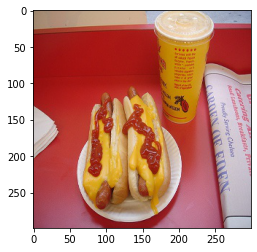

In [ ]:
image_path = valid_path+'/hotdog/1510.jpg'
img = Image.open(image_path)
result = predict(image_path, model)
print(result)
plt.imshow(img)

It's not a Hotdog!


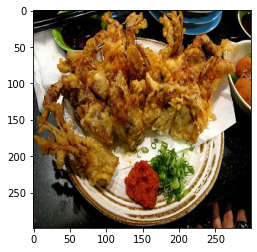

In [ ]:
image_path = valid_path+'/nothotdog/2873.jpg'
img = Image.open(image_path)
result = predict(image_path, model)
print(result)
plt.imshow(img)
